# Convolutional neural networks

In class, we have briefly reviewed the idea of learning good features directly from data and went through the concept of convolutional neural networks along with few architectures.

Until recently, building convolutional neural networks was tough. There was no high-level tools for that, you would be required to understand all the internal mechanics of the model and its operations.

Today, due to the high-level tools such as Keras and TensorFlow, everybody can build a convolutional neural network and put it to work without diving deep into them. What used to be a one-month project became a few hours exercise.


In [0]:
import pickle
import numpy as np
import keras
import matplotlib.pyplot as plt
np.random.seed(44)

## Loading the images

In [0]:
train_images, train_labels = pickle.load(open('data/train_set_all.pkl', 'rb'))
cv_images, cv_labels = pickle.load(open('data/test_set_all.pkl', 'rb'))

In [6]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000


In [7]:
print(cv_images.shape)
print(len(cv_labels))

(10000, 32, 32, 3)
10000


In [8]:
print(train_labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [0]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array)

In [0]:
def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', labels[example_index])

Label:  6


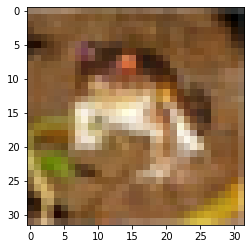

In [11]:
show_example(train_images, train_labels, example_index = 0)

Label:  3


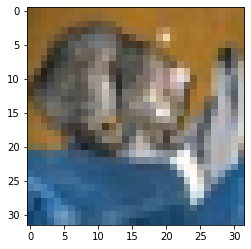

In [12]:
show_example(cv_images, cv_labels, example_index = 0)

## Building AlexNet

In 2012 a convolutional neural network called AlexNet won ImageNet competition. 

Go through an [original AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to investigate the architecture. Next, investigate the [basics of Keras](https://keras.io/#keras-the-python-deep-learning-library). We will use it with TensorFlow backend.

You are also encouraged to go through some CNN tutorial for Keras. There is a number of them online (for example, [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) or [this](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)).
Now, build AlexNex network with Keras for object recognition. Note that standard AlexNet works with 224x224 input images. The dataset you are going to use for this problem is 32x32.

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(3,3), strides=(4,4), activation="relu"))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))

model.add(Flatten())

model.add(Dense(4096, input_shape=(32*32*3,), activation="relu"))

model.add(Dense(4096, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 3, 3, 256)         614656    
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 1, 1, 384)         885120    
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 1, 1, 384)         1327488   
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 1, 1, 256)       

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10, dtype='int32') 
cv_labels = keras.utils.to_categorical(cv_labels, num_classes=10, dtype='int32') 

## Training AlexNet

Use training set for training the network to recognize objects. You might want to use RMSProp optimizer to speed up the training.

Convolutional networks require a lot of computing power for training. Typical setup for training CNN is to use GPU, however, in this problem you are not required to do so. CPU will be fine as well.

If you are using CPU for this subproblem, training process might be slow. You can stop it manually as soon as you get meaningful results.

Report the results on the training and cross-validation sets. The report should contain the training logs.

In [79]:
epochs = 50
batch_size = 512
model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs)

Epoch 1/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.9714 - accuracy: 0.1245
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.1816 - accuracy: 0.1835
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.9956 - accuracy: 0.2477
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8856 - accuracy: 0.3010
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7750 - accuracy: 0.3475
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7139 - accuracy: 0.3807
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6149 - accuracy: 0.4233
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5492 - accuracy: 0.4498
Epoch 9/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4942 - accuracy: 0.4724
Epoch 10/50
50000/50000 [==============================

In [80]:
scores = model.evaluate(cv_images, cv_labels)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 117us/step
Test loss: 4.4461366756439205
Test accuracy: 0.5372999906539917


## Improving AlexNet

As you can see, AlexNet does not work very well on such a small dataset. Recall what you have learned from this class to improve its performance. You can also take a look at the [Dropout technique](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) and its [implementation in Keras](https://keras.io/layers/core/#dropout). 

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(3, 3), strides=(4,4), activation="relu"))

model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(filters=150, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=120, kernel_size=(4,4), strides=(1,1), padding="same", activation="relu"))

model.add(Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), padding="same", activation="relu"))

model.add(Conv2D(filters=120, kernel_size=(6,6), strides=(1,1), padding="same", activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"))
model.add(Flatten())

model.add(Dense(600, input_shape=(32*32*3,), activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(300, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 3, 3, 150)         129750    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 1, 1, 150)         0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 1, 1, 120)         288120    
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 1, 1, 120)         360120    
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 1, 1, 120)       

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
epochs = 80
batch_size = 512
model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs)

Epoch 1/80
50000/50000 [==============================] - 2s 35us/step - loss: 2.0041 - accuracy: 0.2194
Epoch 2/80
50000/50000 [==============================] - 1s 29us/step - loss: 1.7273 - accuracy: 0.3276
Epoch 3/80
50000/50000 [==============================] - 2s 30us/step - loss: 1.6024 - accuracy: 0.3918
Epoch 4/80
50000/50000 [==============================] - 1s 29us/step - loss: 1.5011 - accuracy: 0.4432
Epoch 5/80
50000/50000 [==============================] - 1s 29us/step - loss: 1.4154 - accuracy: 0.4877
Epoch 6/80
50000/50000 [==============================] - 1s 28us/step - loss: 1.3591 - accuracy: 0.5137
Epoch 7/80
50000/50000 [==============================] - 1s 28us/step - loss: 1.2925 - accuracy: 0.5389
Epoch 8/80
50000/50000 [==============================] - 1s 28us/step - loss: 1.2497 - accuracy: 0.5556
Epoch 9/80
50000/50000 [==============================] - 1s 28us/step - loss: 1.2238 - accuracy: 0.5624
Epoch 10/80
50000/50000 [==============================

In [89]:
scores = model.evaluate(cv_images, cv_labels)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 99us/step
Test loss: 2.6337867588043213
Test accuracy: 0.5453000068664551
